In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
# Loading Data
data = pd.read_csv('Final_cleaned_Train_data.csv')

In [3]:
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [4]:
data.shape

(3865, 80)

In [5]:
print(data['galaxy'].value_counts())

16     26
155    26
17     26
9      26
10     26
       ..
19     17
26     17
128    17
180    17
126     1
Name: galaxy, Length: 181, dtype: int64


In [6]:
#dropping 126 galaxy
new_data = data[data['galaxy'] !=126]

In [7]:
new_data.shape

(3864, 80)

In [8]:
X_data = new_data.iloc[:,:-1]
y_labels = new_data.iloc[:,-1]

In [9]:
# dropping galaxy 126 as it has only 1 sample
print(X_data['galaxy'].value_counts())

16     26
17     26
10     26
155    26
9      26
       ..
19     17
7      17
26     17
128    17
180    17
Name: galaxy, Length: 180, dtype: int64


In [10]:
X_data.shape

(3864, 79)

In [11]:
y_labels.shape

(3864,)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_labels, test_size=0.2, stratify = X_data['galaxy'])

In [13]:
X_train.shape

(3091, 79)

In [14]:
X_test.shape

(773, 79)

In [15]:
y_train.shape

(3091,)

In [16]:
y_test.shape

(773,)

In [17]:
X_train['galaxy'].nunique()

180

In [18]:
X_test['galaxy'].nunique()

180

In [19]:
# Standardizing Data
stored_train_columns = X_train[['galactic year','galaxy']]
stored_test_columns = X_test[['galactic year','galaxy']]

X_train_dropped_data = X_train.drop(['galactic year','galaxy'],axis = 1)
X_test_dropped_data =  X_test.drop(['galactic year','galaxy'],axis = 1)


In [20]:
stored_train_columns

,galactic year,galaxy
1060,995006.0,166
470,992016.0,37
2631,1004004.0,160
1363,997002.0,1
1258,996004.0,8
...,...,...
1822,1000000.0,22
134,990025.0,22
404,992016.0,77
1033,995006.0,68


In [21]:
stored_train_columns.shape

(3091, 2)

In [22]:
train_features = X_train_dropped_data
test_features   = X_test_dropped_data

In [23]:
# normalization of Data
# Train Data
mean = train_features.mean(axis=0)
train_features -= mean
std = train_features.std(axis=0)
train_features /= std

#Test Data
test_features -= mean
test_features /= std

In [24]:
scaled_train_data = pd.concat([stored_train_columns,train_features],axis =1)

In [25]:
scaled_train_data

,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,...,Current health expenditure (% of GGP),"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII)
1060,995006.0,166,-3.266249,-2.766212,-0.704361,-1.965267,-1.586364,-1.516251,-1.918172,-1.172919,...,-0.004321,-5.691337,-5.933760,-1.919086,1.343637,1.901997,-0.001653,1.520716,0.006258,0.113182
470,992016.0,37,-0.613424,-0.713645,-0.481226,-0.938958,-1.811799,-1.464995,-1.534451,-1.321881,...,-0.004321,-0.001897,0.000475,-0.002351,0.003915,0.004886,-0.001653,-0.001565,0.006258,0.009878
2631,1004004.0,160,0.082304,0.004699,-0.108659,-0.213150,0.472131,1.058757,0.325925,0.710080,...,-0.004321,-0.001897,0.000475,-0.002351,0.003915,0.004886,-0.001653,-0.001565,0.006258,0.009878
1363,997002.0,1,-1.108157,-1.378685,-0.456780,-0.936021,-0.954947,-0.879195,-1.162375,-0.881780,...,-0.004321,-0.001897,0.000475,-0.002351,0.003915,0.004886,-0.001653,-0.001565,0.006258,0.009878
1258,996004.0,8,-1.071148,-1.145156,-0.467860,-1.306873,-1.172366,-1.617714,-1.622076,-1.597030,...,-0.004321,-0.001897,0.000475,-0.002351,0.003915,0.004886,-0.001653,-0.001565,0.006258,0.009878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,1000000.0,22,0.829163,0.322800,-0.125333,0.396758,1.014694,0.119163,0.147581,0.753073,...,-0.722479,1.667195,-0.062616,2.581139,-0.651298,-0.953396,-1.423856,-0.001565,-0.414907,-1.576630
134,990025.0,22,0.383035,-0.185583,0.266389,0.754422,0.082442,0.121555,0.359407,0.348488,...,-0.004321,-0.001897,0.000475,-0.002351,0.003915,0.004886,-0.001653,-0.001565,0.006258,0.009878
404,992016.0,77,-1.367844,-1.017745,-0.544730,-1.215367,-1.844757,-1.807514,-2.040607,-2.804013,...,-0.004321,-0.001897,0.000475,-0.002351,0.003915,0.004886,-0.001653,-0.001565,0.006258,0.009878
1033,995006.0,68,0.609783,0.322491,-0.726688,-0.800931,-0.988433,-1.122083,-0.074334,-0.154687,...,-0.004321,-0.771435,-1.473617,-2.738930,0.800086,-0.935118,-0.001653,-0.001565,0.006258,1.525587


In [26]:
scaled_test_data = pd.concat([stored_test_columns, test_features], axis =1)

In [27]:
scaled_test_data

,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,...,Current health expenditure (% of GGP),"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII)
601,993012.0,2,0.976928,1.101094,0.362476,0.707126,1.129424,0.381974,0.816205,0.403964,...,-0.004321,-0.001897,0.000475,-0.002351,0.003915,0.004886,-0.001653,-0.001565,0.006258,0.009878
2038,1001000.0,100,1.008007,1.014735,0.957234,1.250412,1.624586,0.825949,2.254486,1.130446,...,-0.004321,-0.001897,0.000475,-0.002351,0.003915,0.004886,-0.001653,-0.001565,0.006258,0.009878
65,990025.0,175,0.088595,0.412226,-0.668032,0.234703,-0.293189,-0.566261,-0.474347,-0.702615,...,-0.004321,-0.001897,0.000475,-0.002351,0.003915,0.004886,-0.043408,-0.910931,0.976932,0.009878
3828,1015056.0,169,0.081212,0.586850,0.110313,0.828387,-0.578140,1.060313,-0.054520,0.554685,...,0.222136,-0.001897,0.000475,-0.002351,0.003915,0.004886,-0.001653,-0.001565,0.006258,0.009878
3285,1009020.0,117,-0.986908,-0.891296,-0.953691,-1.510296,-2.267827,-1.499031,-2.493804,-1.619828,...,-0.004321,-0.001897,0.000475,-0.002351,0.003915,0.004886,-0.001653,-0.001565,0.006258,0.009878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096,1001000.0,87,-0.006544,-0.433455,-0.430197,0.415921,0.838891,0.539618,0.071351,0.953831,...,-0.004321,-0.001897,0.000475,-0.002351,0.003915,0.004886,-0.001653,-0.001565,0.006258,0.009878
2571,1004004.0,139,0.427700,0.184519,-0.646113,-1.011870,0.347879,0.978818,-0.002122,0.500770,...,-0.004321,-0.001897,0.000475,-0.002351,0.003915,0.004886,-0.001653,-0.001565,0.006258,0.009878
3620,1013042.0,44,-1.318769,-0.736592,-0.243282,-0.043978,-0.069144,-0.741121,-0.055689,-0.430678,...,1.030937,-1.345272,-0.445567,0.610905,1.900977,2.045420,1.459685,10.624741,0.454712,2.996305
3509,1011030.0,134,1.134833,1.087234,1.255946,1.588013,2.407455,1.320025,1.900883,1.602118,...,2.737389,3.603938,3.209392,2.459849,-2.996140,-3.533712,1.184625,-0.001565,-0.379766,-4.753758


In [28]:
# Building Model
from tensorflow.keras import layers, models, optimizers

In [40]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',input_shape=(scaled_train_data.shape[1],)))
    model.add(layers.Dropout(0.25))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dropout(0.25))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dropout(0.25))
    model.add(layers.Dense(1))
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(optimizer=optimizer , loss='mse', metrics=['mse','mae'])
    return model

In [41]:
train_labels = y_train

In [42]:
scaled_train_data.shape

(3091, 79)

In [43]:
train_labels.shape

(3091,)

In [44]:
def validation():
    k = 3
    num_epochs = 20
    num_val_samples = len(scaled_train_data) // k
    all_mae_histories = []
    for i in range(k):
        print('processing fold #', i)
        val_data = scaled_train_data[i * num_val_samples: (i + 1) * num_val_samples]
        val_targets = train_labels[i * num_val_samples: (i + 1) * num_val_samples]
        partial_train_data = np.concatenate([scaled_train_data[:i * num_val_samples], scaled_train_data[(i + 1) * num_val_samples:]],axis=0)
        partial_train_targets = np.concatenate([train_labels[:i * num_val_samples],
                                                train_labels[(i + 1) * num_val_samples:]], axis=0)
        model = build_model()
        history = model.fit(partial_train_data, partial_train_targets,validation_data=(val_data, val_targets),
                            epochs=num_epochs, batch_size=1, verbose=0)
        mae_history = history.history['val_mae']
        all_mae_histories.append(mae_history)
    return all_mae_histories

In [45]:
import datetime as dt

num_epochs = 20
all_mae_histories = validation()



processing fold # 0
processing fold # 1
processing fold # 2


In [46]:

average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]


In [47]:
average_mae_history

[0.40311053,
 0.061960895,
 0.039843466,
 0.039735842,
 0.042874407,
 0.0419998,
 0.044526976,
 0.041854497,
 0.043020416,
 0.04355459,
 0.040793046,
 0.04080237,
 0.043279815,
 0.044376347,
 0.04258111,
 0.038992185,
 0.042960834,
 0.04227758,
 0.04028135,
 0.043875728]

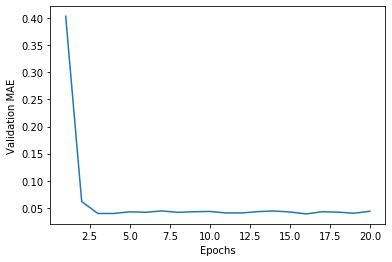

In [48]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [94]:
def final_model():
    model = models.Sequential()
    model.add(layers.Dense(16, activation='relu',input_shape=(scaled_train_data.shape[1],)))
    model.add(layers.Dropout(0.25))
    model.add(layers.Dense(8, activation='relu'))
    model.add(layers.Dropout(0.25))
    model.add(layers.Dense(1))
#     optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(optimizer='adam' , loss='mse', metrics=['mae'])
    return model

In [95]:
train_data = scaled_train_data
test_data = scaled_test_data
test_targets = y_test

In [96]:
model = build_model()
history = model.fit(train_data, train_labels,validation_split = 0.2,epochs=15, batch_size=16, verbose=1)


Train on 2472 samples, validate on 619 samples
Epoch 1/15
2472/2472 [==============================] - 1s 368us/sample - loss: 353714065.7735 - mse: 353714112.0000 - mae: 11291.7139 - val_loss: 209.7727 - val_mse: 209.7727 - val_mae: 14.4829
Epoch 2/15
2472/2472 [==============================] - 0s 121us/sample - loss: 10007709.4520 - mse: 10007708.0000 - mae: 1670.5193 - val_loss: 346.0194 - val_mse: 346.0193 - val_mae: 18.6011
Epoch 3/15
2472/2472 [==============================] - 0s 121us/sample - loss: 874645.2410 - mse: 874645.3125 - mae: 317.8106 - val_loss: 56.7298 - val_mse: 56.7298 - val_mae: 7.5314
Epoch 4/15
2472/2472 [==============================] - 0s 116us/sample - loss: 122641.3500 - mse: 122641.3438 - mae: 62.6944 - val_loss: 0.0047 - val_mse: 0.0047 - val_mae: 0.0393
Epoch 5/15
2472/2472 [==============================] - 0s 122us/sample - loss: 58055.4714 - mse: 58055.4453 - mae: 19.7089 - val_loss: 0.2025 - val_mse: 0.2025 - val_mae: 0.4450
Epoch 6/15
2472/2472 [

RMSE on test data set is 0.06710263001849448
R2 on test data set is -0.24869634557329845


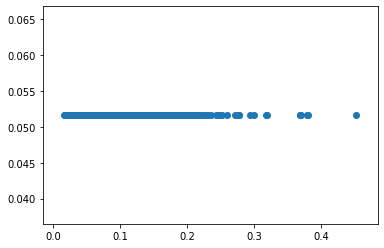

In [97]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
y_hat = model.predict(test_data)
rmse_test_score = mean_squared_error(test_targets, y_hat, squared= False)
r2_score = r2_score(test_targets,y_hat)
print("RMSE on test data set is {}".format(rmse_test_score))
print("R2 on test data set is {}".format(r2_score))
plt.scatter(test_targets, y_hat)
plt.show()

In [98]:
 model.evaluate(test_data, test_targets)

773/773 [==============================] - 0s 35us/sample - loss: 0.0045 - mse: 0.0045 - mae: 0.0364


[0.00450276298614708, 0.0045027626, 0.036364716]

In [99]:
# taking predictions

predictions = model.predict(test_data)

In [100]:
predictions


array([[0.05165146],
       [0.05165146],
       [0.05165146],
       [0.05165146],
       [0.05165146],
       [0.05165146],
       [0.05165146],
       [0.05165146],
       [0.05165146],
       [0.05165146],
       [0.05165146],
       [0.05165146],
       [0.05165146],
       [0.05165146],
       [0.05165146],
       [0.05165146],
       [0.05165146],
       [0.05165146],
       [0.05165146],
       [0.05165146],
       [0.05165146],
       [0.05165146],
       [0.05165146],
       [0.05165146],
       [0.05165146],
       [0.05165146],
       [0.05165146],
       [0.05165146],
       [0.05165146],
       [0.05165146],
       [0.05165146],
       [0.05165146],
       [0.05165146],
       [0.05165146],
       [0.05165146],
       [0.05165146],
       [0.05165146],
       [0.05165146],
       [0.05165146],
       [0.05165146],
       [0.05165146],
       [0.05165146],
       [0.05165146],
       [0.05165146],
       [0.05165146],
       [0.05165146],
       [0.05165146],
       [0.051

In [105]:
test_targets

410     0.052006
670     0.059347
181     0.051350
3247    0.034126
2217    0.042873
          ...   
3724    0.083577
944     0.066515
1932    0.045851
2368    0.044675
163     0.250266
Name: y, Length: 773, dtype: float64

RMSE on test data set is 0.18580528282788986
R2 on test data set is -8.574009888463843


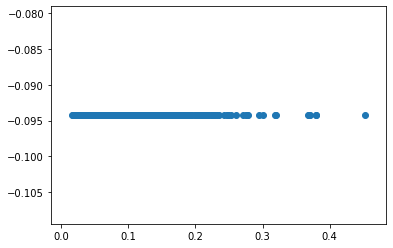

In [56]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
y_hat = model.predict(test_data)
rmse_test_score = mean_squared_error(test_targets, y_hat, squared= False)
r2_score = r2_score(test_targets,y_hat)
print("RMSE on test data set is {}".format(rmse_test_score))
print("R2 on test data set is {}".format(r2_score))
plt.scatter(test_targets, y_hat)
plt.show()

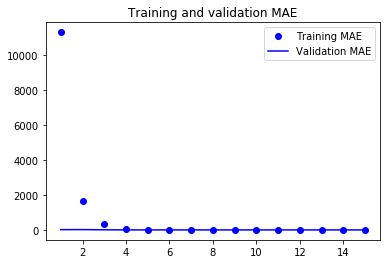

<Figure size 432x288 with 0 Axes>

In [101]:
mae = history.history['mae']
val_mae = history.history['val_mae']
epochs = range(1, len(mae) + 1)
plt.plot(epochs, mae, 'bo', label='Training MAE')
plt.plot(epochs, val_mae, 'b', label='Validation MAE')
plt.title('Training and validation MAE')
plt.legend()
plt.figure()
plt.show()

In [102]:
test_without_y = pd.read_csv('Final_cleaned_test.csv')

In [105]:
test_without_y

,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,...,Current health expenditure (% of GGP),"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII)
0,1007012.0,84,0.456086,51.562543,12236.576447,0.593325,10.414164,10.699072,0.547114,0.556267,...,8.837096,0.823561,0.844209,1.008465,121.754797,120.873428,21.252922,6.443023,22.261474,0.600733
1,1007012.0,142,0.529835,57.228262,3431.883825,0.675407,7.239485,5.311122,0.497688,0.409969,...,8.837096,0.823561,0.844209,1.008465,121.754797,120.873428,21.252922,6.443023,22.261474,0.600733
2,1008016.0,142,0.560976,59.379539,27562.914252,0.594624,11.774890,5.937797,0.544744,0.486167,...,8.837096,0.823561,0.844209,1.008465,121.754797,120.873428,21.252922,6.443023,22.261474,0.600733
3,1007012.0,147,0.565910,59.952390,20352.232905,0.837700,11.613621,10.067882,0.691641,0.523441,...,8.837096,0.823561,0.844209,1.008465,121.754797,120.873428,21.252922,6.443023,22.261474,0.600733
4,1013042.0,178,0.588274,55.428320,23959.704016,0.520579,10.392416,6.374637,0.530676,0.580418,...,7.357729,0.583373,0.600445,0.856158,206.674424,224.104054,21.252922,7.687626,22.261474,0.600733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,1016064.0,58,0.872479,76.798111,31633.240872,0.825154,14.723296,10.283959,0.804246,0.745900,...,8.837096,0.823561,0.844209,1.008465,121.754797,120.873428,21.252922,6.443023,22.261474,0.600733
886,1016064.0,116,0.872479,76.798111,31633.240872,0.825154,14.723296,10.283959,0.804246,0.745900,...,8.837096,0.823561,0.844209,1.008465,121.754797,120.873428,21.252922,6.443023,22.261474,0.600733
887,1016064.0,57,0.872479,76.798111,31633.240872,0.825154,14.723296,10.283959,0.804246,0.745900,...,8.837096,0.823561,0.844209,1.008465,121.754797,120.873428,21.252922,6.443023,22.261474,0.600733
888,1016064.0,61,0.872479,76.798111,31633.240872,0.825154,14.723296,10.283959,0.804246,0.745900,...,8.837096,0.823561,0.844209,1.008465,121.754797,120.873428,21.252922,6.443023,22.261474,0.600733


In [106]:
stored_new_test_cols = test_without_y[['galactic year','galaxy']]

In [108]:
test_without_y = test_without_y.drop(['galactic year','galaxy'], axis = 1)

In [110]:
test_without_y -= mean
test_without_y /= std

In [111]:
test_without_y

,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",Population using at least basic drinking-water services (%),...,Current health expenditure (% of GGP),"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII)
0,-2.572517,-2.423467,-1.041380,-1.197185,-1.202941,0.134015,-1.546366,-0.996235,1.980911,0.226492,...,-0.004321,-0.001897,0.000475,-0.002351,0.003915,0.004886,-0.001653,-0.001565,0.006258,0.009878
1,-2.117438,-1.880113,-1.513627,-0.773221,-2.093949,-1.568827,-1.843714,-1.767789,2.283863,-3.100619,...,-0.004321,-0.001897,0.000475,-0.002351,0.003915,0.004886,-0.001653,-0.001565,0.006258,0.009878
2,-1.925277,-1.673801,-0.219340,-1.190475,-0.821038,-1.370769,-1.560625,-1.365928,2.328783,-2.897124,...,-0.004321,-0.001897,0.000475,-0.002351,0.003915,0.004886,-0.001653,-0.001565,0.006258,0.009878
3,-1.894829,-1.618863,-0.606091,0.065041,-0.866300,-0.065470,-0.676887,-1.169354,1.553247,-2.128917,...,-0.004321,-0.001897,0.000475,-0.002351,0.003915,0.004886,-0.001653,-0.001565,0.006258,0.009878
4,-1.756830,-2.052731,-0.412601,-1.572931,-1.209044,-1.232707,-1.645258,-0.868866,2.023425,-2.156344,...,-1.129540,-2.653000,-3.129808,-3.606809,3.856540,4.620892,-0.001653,0.524156,0.006258,0.009878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,-0.003110,-0.003323,-0.001025,0.000236,0.006464,0.002820,0.000551,0.003860,0.006459,0.004459,...,-0.004321,-0.001897,0.000475,-0.002351,0.003915,0.004886,-0.001653,-0.001565,0.006258,0.009878
886,-0.003110,-0.003323,-0.001025,0.000236,0.006464,0.002820,0.000551,0.003860,0.006459,0.004459,...,-0.004321,-0.001897,0.000475,-0.002351,0.003915,0.004886,-0.001653,-0.001565,0.006258,0.009878
887,-0.003110,-0.003323,-0.001025,0.000236,0.006464,0.002820,0.000551,0.003860,0.006459,0.004459,...,-0.004321,-0.001897,0.000475,-0.002351,0.003915,0.004886,-0.001653,-0.001565,0.006258,0.009878
888,-0.003110,-0.003323,-0.001025,0.000236,0.006464,0.002820,0.000551,0.003860,0.006459,0.004459,...,-0.004321,-0.001897,0.000475,-0.002351,0.003915,0.004886,-0.001653,-0.001565,0.006258,0.009878


In [112]:
final_data_to_predict = pd.concat([stored_new_test_cols,test_without_y ], axis =1)

In [114]:
test_without_y

,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",Population using at least basic drinking-water services (%),...,Current health expenditure (% of GGP),"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII)
0,-2.572517,-2.423467,-1.041380,-1.197185,-1.202941,0.134015,-1.546366,-0.996235,1.980911,0.226492,...,-0.004321,-0.001897,0.000475,-0.002351,0.003915,0.004886,-0.001653,-0.001565,0.006258,0.009878
1,-2.117438,-1.880113,-1.513627,-0.773221,-2.093949,-1.568827,-1.843714,-1.767789,2.283863,-3.100619,...,-0.004321,-0.001897,0.000475,-0.002351,0.003915,0.004886,-0.001653,-0.001565,0.006258,0.009878
2,-1.925277,-1.673801,-0.219340,-1.190475,-0.821038,-1.370769,-1.560625,-1.365928,2.328783,-2.897124,...,-0.004321,-0.001897,0.000475,-0.002351,0.003915,0.004886,-0.001653,-0.001565,0.006258,0.009878
3,-1.894829,-1.618863,-0.606091,0.065041,-0.866300,-0.065470,-0.676887,-1.169354,1.553247,-2.128917,...,-0.004321,-0.001897,0.000475,-0.002351,0.003915,0.004886,-0.001653,-0.001565,0.006258,0.009878
4,-1.756830,-2.052731,-0.412601,-1.572931,-1.209044,-1.232707,-1.645258,-0.868866,2.023425,-2.156344,...,-1.129540,-2.653000,-3.129808,-3.606809,3.856540,4.620892,-0.001653,0.524156,0.006258,0.009878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,-0.003110,-0.003323,-0.001025,0.000236,0.006464,0.002820,0.000551,0.003860,0.006459,0.004459,...,-0.004321,-0.001897,0.000475,-0.002351,0.003915,0.004886,-0.001653,-0.001565,0.006258,0.009878
886,-0.003110,-0.003323,-0.001025,0.000236,0.006464,0.002820,0.000551,0.003860,0.006459,0.004459,...,-0.004321,-0.001897,0.000475,-0.002351,0.003915,0.004886,-0.001653,-0.001565,0.006258,0.009878
887,-0.003110,-0.003323,-0.001025,0.000236,0.006464,0.002820,0.000551,0.003860,0.006459,0.004459,...,-0.004321,-0.001897,0.000475,-0.002351,0.003915,0.004886,-0.001653,-0.001565,0.006258,0.009878
888,-0.003110,-0.003323,-0.001025,0.000236,0.006464,0.002820,0.000551,0.003860,0.006459,0.004459,...,-0.004321,-0.001897,0.000475,-0.002351,0.003915,0.004886,-0.001653,-0.001565,0.006258,0.009878


In [117]:
combined_prev_train = pd.concat([scaled_train_data,y_train], axis =1)

combined_prev_test = pd.concat([scaled_test_data,y_test], axis =1)



In [118]:
combined_prev_train

,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,...,"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),y
1060,995006.0,166,-3.266249,-2.766212,-0.704361,-1.965267,-1.586364,-1.516251,-1.918172,-1.172919,...,-5.691337,-5.933760,-1.919086,1.343637,1.901997,-0.001653,1.520716,0.006258,0.113182,0.046046
470,992016.0,37,-0.613424,-0.713645,-0.481226,-0.938958,-1.811799,-1.464995,-1.534451,-1.321881,...,-0.001897,0.000475,-0.002351,0.003915,0.004886,-0.001653,-0.001565,0.006258,0.009878,0.052113
2631,1004004.0,160,0.082304,0.004699,-0.108659,-0.213150,0.472131,1.058757,0.325925,0.710080,...,-0.001897,0.000475,-0.002351,0.003915,0.004886,-0.001653,-0.001565,0.006258,0.009878,0.069361
1363,997002.0,1,-1.108157,-1.378685,-0.456780,-0.936021,-0.954947,-0.879195,-1.162375,-0.881780,...,-0.001897,0.000475,-0.002351,0.003915,0.004886,-0.001653,-0.001565,0.006258,0.009878,0.051325
1258,996004.0,8,-1.071148,-1.145156,-0.467860,-1.306873,-1.172366,-1.617714,-1.622076,-1.597030,...,-0.001897,0.000475,-0.002351,0.003915,0.004886,-0.001653,-0.001565,0.006258,0.009878,0.047949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,1000000.0,22,0.829163,0.322800,-0.125333,0.396758,1.014694,0.119163,0.147581,0.753073,...,1.667195,-0.062616,2.581139,-0.651298,-0.953396,-1.423856,-0.001565,-0.414907,-1.576630,0.088453
134,990025.0,22,0.383035,-0.185583,0.266389,0.754422,0.082442,0.121555,0.359407,0.348488,...,-0.001897,0.000475,-0.002351,0.003915,0.004886,-0.001653,-0.001565,0.006258,0.009878,0.090360
404,992016.0,77,-1.367844,-1.017745,-0.544730,-1.215367,-1.844757,-1.807514,-2.040607,-2.804013,...,-0.001897,0.000475,-0.002351,0.003915,0.004886,-0.001653,-0.001565,0.006258,0.009878,0.048033
1033,995006.0,68,0.609783,0.322491,-0.726688,-0.800931,-0.988433,-1.122083,-0.074334,-0.154687,...,-0.771435,-1.473617,-2.738930,0.800086,-0.935118,-0.001653,-0.001565,0.006258,1.525587,0.067214


In [119]:
combined_prev_test

,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,...,"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),y
601,993012.0,2,0.976928,1.101094,0.362476,0.707126,1.129424,0.381974,0.816205,0.403964,...,-0.001897,0.000475,-0.002351,0.003915,0.004886,-0.001653,-0.001565,0.006258,0.009878,0.170171
2038,1001000.0,100,1.008007,1.014735,0.957234,1.250412,1.624586,0.825949,2.254486,1.130446,...,-0.001897,0.000475,-0.002351,0.003915,0.004886,-0.001653,-0.001565,0.006258,0.009878,0.235432
65,990025.0,175,0.088595,0.412226,-0.668032,0.234703,-0.293189,-0.566261,-0.474347,-0.702615,...,-0.001897,0.000475,-0.002351,0.003915,0.004886,-0.043408,-0.910931,0.976932,0.009878,0.061391
3828,1015056.0,169,0.081212,0.586850,0.110313,0.828387,-0.578140,1.060313,-0.054520,0.554685,...,-0.001897,0.000475,-0.002351,0.003915,0.004886,-0.001653,-0.001565,0.006258,0.009878,0.024015
3285,1009020.0,117,-0.986908,-0.891296,-0.953691,-1.510296,-2.267827,-1.499031,-2.493804,-1.619828,...,-0.001897,0.000475,-0.002351,0.003915,0.004886,-0.001653,-0.001565,0.006258,0.009878,0.037373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096,1001000.0,87,-0.006544,-0.433455,-0.430197,0.415921,0.838891,0.539618,0.071351,0.953831,...,-0.001897,0.000475,-0.002351,0.003915,0.004886,-0.001653,-0.001565,0.006258,0.009878,0.094373
2571,1004004.0,139,0.427700,0.184519,-0.646113,-1.011870,0.347879,0.978818,-0.002122,0.500770,...,-0.001897,0.000475,-0.002351,0.003915,0.004886,-0.001653,-0.001565,0.006258,0.009878,0.066103
3620,1013042.0,44,-1.318769,-0.736592,-0.243282,-0.043978,-0.069144,-0.741121,-0.055689,-0.430678,...,-1.345272,-0.445567,0.610905,1.900977,2.045420,1.459685,10.624741,0.454712,2.996305,0.023608
3509,1011030.0,134,1.134833,1.087234,1.255946,1.588013,2.407455,1.320025,1.900883,1.602118,...,3.603938,3.209392,2.459849,-2.996140,-3.533712,1.184625,-0.001565,-0.379766,-4.753758,0.229564


In [120]:
final_train_dataset = pd.concat([combined_prev_train,combined_prev_test], axis = 0)

In [124]:
train_X = final_train_dataset.iloc[:,:-1] 
train_Y = final_train_dataset.iloc[:,-1] 

In [125]:
train_X.shape

(3864, 79)

In [126]:
train_Y.shape

(3864,)

In [127]:
def build_final_model():
    model = models.Sequential()
    model.add(layers.Dense(16, activation='relu',input_shape=(train_X.shape[1],)))
    model.add(layers.Dropout(0.25))
    model.add(layers.Dense(8, activation='relu'))
    model.add(layers.Dropout(0.25))
    model.add(layers.Dense(1))
#     optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(optimizer='adam' , loss='mse', metrics=['mse'])
    return model

In [128]:
model = build_final_model()
history = model.fit(train_X, train_Y,validation_split = 0.2,epochs=15, batch_size=32, verbose=1)


Train on 3091 samples, validate on 773 samples
Epoch 1/15
3091/3091 [==============================] - 1s 322us/sample - loss: 5883623177.6901 - mse: 5883621888.0000 - val_loss: 44815788.6210 - val_mse: 44815788.0000
Epoch 2/15
3091/3091 [==============================] - 0s 70us/sample - loss: 935139603.4008 - mse: 935139840.0000 - val_loss: 27764018.9133 - val_mse: 27764018.0000
Epoch 3/15
3091/3091 [==============================] - 0s 66us/sample - loss: 312535743.9560 - mse: 312535776.0000 - val_loss: 13297320.1268 - val_mse: 13297321.0000
Epoch 4/15
3091/3091 [==============================] - 0s 65us/sample - loss: 119596595.8848 - mse: 119596608.0000 - val_loss: 1121821.2573 - val_mse: 1121821.3750
Epoch 5/15
3091/3091 [==============================] - 0s 90us/sample - loss: 68457502.0434 - mse: 68457504.0000 - val_loss: 13382.4317 - val_mse: 13382.4336
Epoch 6/15
3091/3091 [==============================] - 0s 98us/sample - loss: 46993758.0631 - mse: 46993764.0000 - val_loss:

In [129]:
# Evaluating Model
from sklearn.metrics import mean_squared_error
from math import sqrt

In [131]:
pred_train = model.predict(train_X)
print("RMSE on Train Dataset: ",np.sqrt(mean_squared_error(train_Y,pred_train)))


RMSE on Train Dataset:  0.06361821175844304


In [132]:
test_data

,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,...,Current health expenditure (% of GGP),"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII)
601,993012.0,2,0.976928,1.101094,0.362476,0.707126,1.129424,0.381974,0.816205,0.403964,...,-0.004321,-0.001897,0.000475,-0.002351,0.003915,0.004886,-0.001653,-0.001565,0.006258,0.009878
2038,1001000.0,100,1.008007,1.014735,0.957234,1.250412,1.624586,0.825949,2.254486,1.130446,...,-0.004321,-0.001897,0.000475,-0.002351,0.003915,0.004886,-0.001653,-0.001565,0.006258,0.009878
65,990025.0,175,0.088595,0.412226,-0.668032,0.234703,-0.293189,-0.566261,-0.474347,-0.702615,...,-0.004321,-0.001897,0.000475,-0.002351,0.003915,0.004886,-0.043408,-0.910931,0.976932,0.009878
3828,1015056.0,169,0.081212,0.586850,0.110313,0.828387,-0.578140,1.060313,-0.054520,0.554685,...,0.222136,-0.001897,0.000475,-0.002351,0.003915,0.004886,-0.001653,-0.001565,0.006258,0.009878
3285,1009020.0,117,-0.986908,-0.891296,-0.953691,-1.510296,-2.267827,-1.499031,-2.493804,-1.619828,...,-0.004321,-0.001897,0.000475,-0.002351,0.003915,0.004886,-0.001653,-0.001565,0.006258,0.009878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096,1001000.0,87,-0.006544,-0.433455,-0.430197,0.415921,0.838891,0.539618,0.071351,0.953831,...,-0.004321,-0.001897,0.000475,-0.002351,0.003915,0.004886,-0.001653,-0.001565,0.006258,0.009878
2571,1004004.0,139,0.427700,0.184519,-0.646113,-1.011870,0.347879,0.978818,-0.002122,0.500770,...,-0.004321,-0.001897,0.000475,-0.002351,0.003915,0.004886,-0.001653,-0.001565,0.006258,0.009878
3620,1013042.0,44,-1.318769,-0.736592,-0.243282,-0.043978,-0.069144,-0.741121,-0.055689,-0.430678,...,1.030937,-1.345272,-0.445567,0.610905,1.900977,2.045420,1.459685,10.624741,0.454712,2.996305
3509,1011030.0,134,1.134833,1.087234,1.255946,1.588013,2.407455,1.320025,1.900883,1.602118,...,2.737389,3.603938,3.209392,2.459849,-2.996140,-3.533712,1.184625,-0.001565,-0.379766,-4.753758


In [133]:
prev_predict =model.predict(test_data)

In [135]:
print("RMSE on Train Dataset: ",np.sqrt(mean_squared_error(test_targets,prev_predict)))


RMSE on Train Dataset:  0.060178096231155616


In [136]:
final_data_to_predict

,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,...,Current health expenditure (% of GGP),"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII)
0,1007012.0,84,-2.572517,-2.423467,-1.041380,-1.197185,-1.202941,0.134015,-1.546366,-0.996235,...,-0.004321,-0.001897,0.000475,-0.002351,0.003915,0.004886,-0.001653,-0.001565,0.006258,0.009878
1,1007012.0,142,-2.117438,-1.880113,-1.513627,-0.773221,-2.093949,-1.568827,-1.843714,-1.767789,...,-0.004321,-0.001897,0.000475,-0.002351,0.003915,0.004886,-0.001653,-0.001565,0.006258,0.009878
2,1008016.0,142,-1.925277,-1.673801,-0.219340,-1.190475,-0.821038,-1.370769,-1.560625,-1.365928,...,-0.004321,-0.001897,0.000475,-0.002351,0.003915,0.004886,-0.001653,-0.001565,0.006258,0.009878
3,1007012.0,147,-1.894829,-1.618863,-0.606091,0.065041,-0.866300,-0.065470,-0.676887,-1.169354,...,-0.004321,-0.001897,0.000475,-0.002351,0.003915,0.004886,-0.001653,-0.001565,0.006258,0.009878
4,1013042.0,178,-1.756830,-2.052731,-0.412601,-1.572931,-1.209044,-1.232707,-1.645258,-0.868866,...,-1.129540,-2.653000,-3.129808,-3.606809,3.856540,4.620892,-0.001653,0.524156,0.006258,0.009878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,1016064.0,58,-0.003110,-0.003323,-0.001025,0.000236,0.006464,0.002820,0.000551,0.003860,...,-0.004321,-0.001897,0.000475,-0.002351,0.003915,0.004886,-0.001653,-0.001565,0.006258,0.009878
886,1016064.0,116,-0.003110,-0.003323,-0.001025,0.000236,0.006464,0.002820,0.000551,0.003860,...,-0.004321,-0.001897,0.000475,-0.002351,0.003915,0.004886,-0.001653,-0.001565,0.006258,0.009878
887,1016064.0,57,-0.003110,-0.003323,-0.001025,0.000236,0.006464,0.002820,0.000551,0.003860,...,-0.004321,-0.001897,0.000475,-0.002351,0.003915,0.004886,-0.001653,-0.001565,0.006258,0.009878
888,1016064.0,61,-0.003110,-0.003323,-0.001025,0.000236,0.006464,0.002820,0.000551,0.003860,...,-0.004321,-0.001897,0.000475,-0.002351,0.003915,0.004886,-0.001653,-0.001565,0.006258,0.009878


In [137]:
final_predictions = model.predict(final_data_to_predict)

In [138]:
final_predictions

array([[0.07766957],
       [0.07766957],
       [0.07766957],
       [0.07766957],
       [0.07766957],
       [0.07766957],
       [0.07766957],
       [0.07766957],
       [0.07766957],
       [0.07766957],
       [0.07766957],
       [0.07766957],
       [0.07766957],
       [0.07766957],
       [0.07766957],
       [0.07766957],
       [0.07766957],
       [0.07766957],
       [0.07766957],
       [0.07766957],
       [0.07766957],
       [0.07766957],
       [0.07766957],
       [0.07766957],
       [0.07766957],
       [0.07766957],
       [0.07766957],
       [0.07766957],
       [0.07766957],
       [0.07766957],
       [0.07766957],
       [0.07766957],
       [0.07766957],
       [0.07766957],
       [0.07766957],
       [0.07766957],
       [0.07766957],
       [0.07766957],
       [0.07766957],
       [0.07766957],
       [0.07766957],
       [0.07766957],
       [0.07766957],
       [0.07766957],
       [0.07766957],
       [0.07766957],
       [0.07766957],
       [0.077

In [152]:
eei = final_data_to_predict['existence expectancy index']

In [155]:
np.array(eei.shape)

array([890])

In [158]:
final_predictions.reshape(1,-1)

array([[0.07766957, 0.07766957, 0.07766957, 0.07766957, 0.07766957,
        0.07766957, 0.07766957, 0.07766957, 0.07766957, 0.07766957,
        0.07766957, 0.07766957, 0.07766957, 0.07766957, 0.07766957,
        0.07766957, 0.07766957, 0.07766957, 0.07766957, 0.07766957,
        0.07766957, 0.07766957, 0.07766957, 0.07766957, 0.07766957,
        0.07766957, 0.07766957, 0.07766957, 0.07766957, 0.07766957,
        0.07766957, 0.07766957, 0.07766957, 0.07766957, 0.07766957,
        0.07766957, 0.07766957, 0.07766957, 0.07766957, 0.07766957,
        0.07766957, 0.07766957, 0.07766957, 0.07766957, 0.07766957,
        0.07766957, 0.07766957, 0.07766957, 0.07766957, 0.07766957,
        0.07766957, 0.07766957, 0.07766957, 0.07766957, 0.07766957,
        0.07766957, 0.07766957, 0.07766957, 0.07766957, 0.07766957,
        0.07766957, 0.07766957, 0.07766957, 0.07766957, 0.07766957,
        0.07766957, 0.07766957, 0.07766957, 0.07766957, 0.07766957,
        0.07766957, 0.07766957, 0.07766957, 0.07

In [159]:
index = final_predictions

pot_inc = -np.log(index+0.01)+3
p2= pot_inc**2
my_submission = pd.DataFrame({
'Index':final_data_to_predict.index,
'pred': final_predictions.reshape(1,-1),
'opt_pred':0,
'eei':eei,})

my_submission.loc[p2.nlargest(400).index, 'opt_pred']=100
my_submission=my_submission.sort_values('pred')
my_submission.iloc[400:600].opt_pred = 50
my_submission=my_submission.sort_index()

increase = (my_submission['opt_pred']*p2)/1000

my_submission[['Index', 'pred', 'opt_pred']].to_csv('submission.csv', index=False)

Exception: Data must be 1-dimensional